## Brief Data Science Intro

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1:  Load Data Into Pandas

In [8]:
# here we'll load a dataframe from a csv file
df = pd.read_csv('https://raw.githubusercontent.com/JonathanBechtel/data/master/boston.csv')
df.drop(df.columns[0], axis=1, inplace=True)
# the head gives us the first 5 rows in the dataframe
df.head(10)

,CRIM,RM,DIS,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,6.575,4.0900,296.0,15.3,4.98,24.0
1,0.02731,6.421,4.9671,242.0,17.8,9.14,21.6
2,0.02729,7.185,4.9671,242.0,17.8,4.03,34.7
3,0.03237,6.998,6.0622,222.0,18.7,2.94,33.4
4,0.06905,7.147,6.0622,222.0,18.7,5.33,36.2
5,0.02985,6.430,6.0622,222.0,18.7,5.21,28.7
6,0.08829,6.012,5.5605,311.0,15.2,12.43,22.9
7,0.14455,6.172,5.9505,311.0,15.2,19.15,27.1
8,0.21124,5.631,6.0821,311.0,15.2,29.93,16.5
9,0.17004,6.004,6.5921,311.0,15.2,17.10,18.9


In [ ]:
# pull descriptive statistics on each of our columns
df.describe()

In [ ]:
# find out how many missing values we have
df.isnull().sum()

### Exploratory Data Analysis

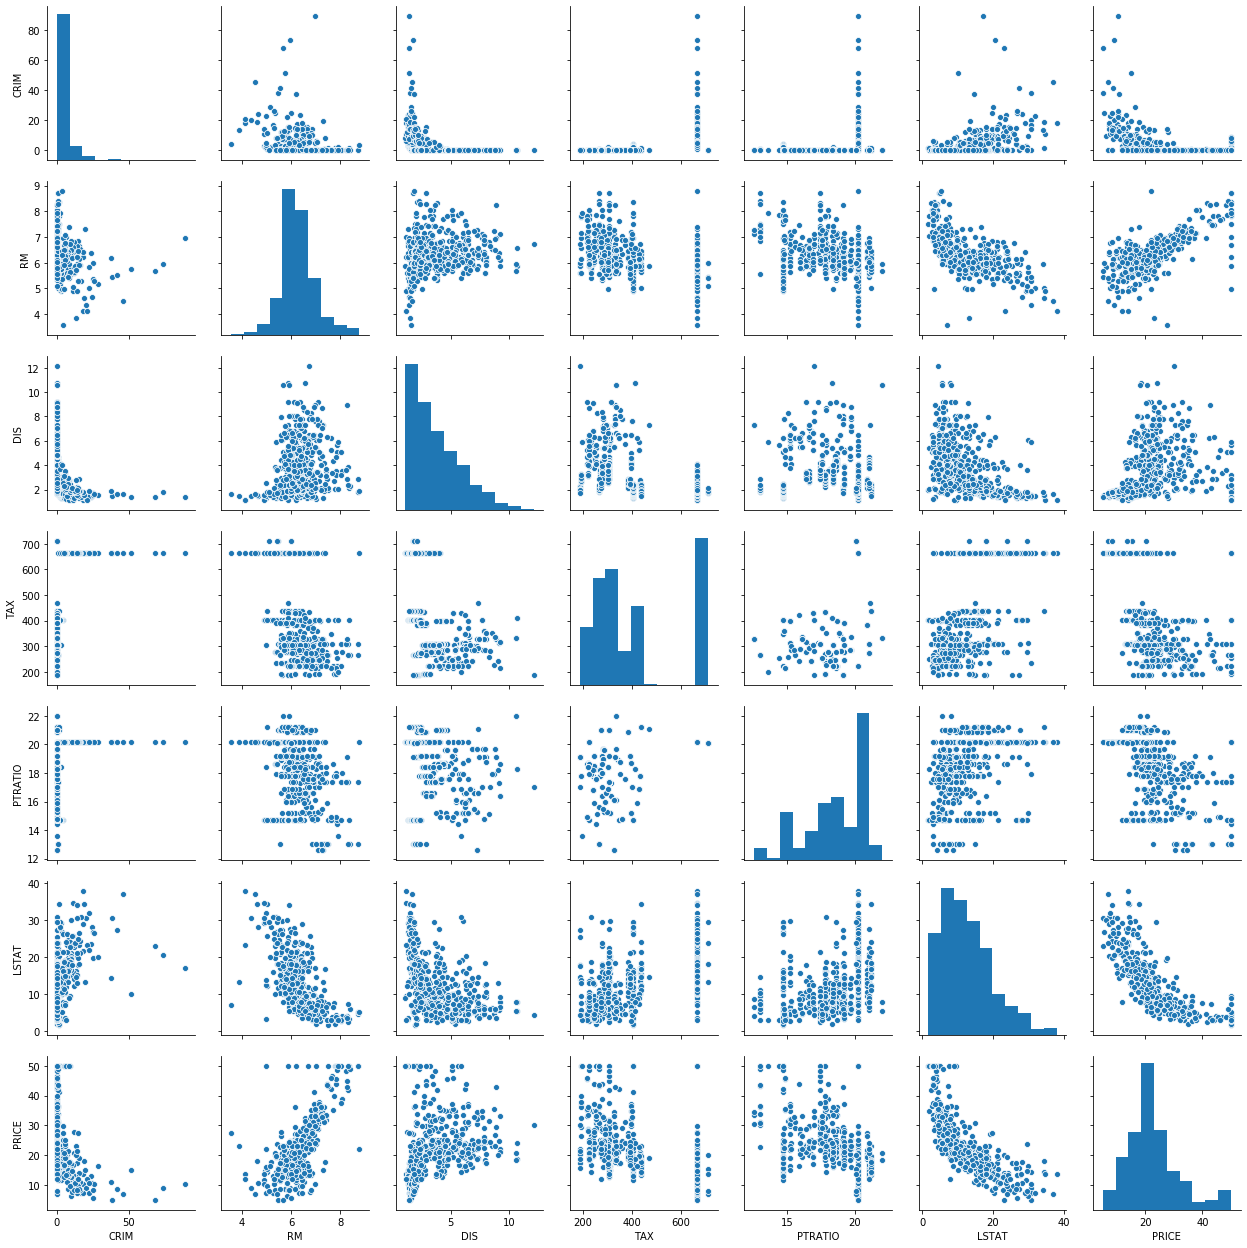

In [12]:
# we can also use matplotlib and seaborn to quickly create different visuals
sns.pairplot(df);

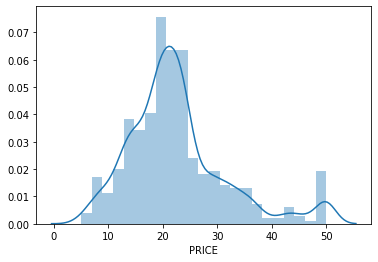

In [9]:
sns.distplot(df['PRICE']);

### Model Fitting With Scikit Learn

In [13]:
# next, we'll use our dataframe to implement a linear model with scikit learn
model = LinearRegression(n_jobs=-1)
X = df[['CRIM', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']]
y = df['PRICE']
model.fit(X, y) # here we're training the model on the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [14]:
# we're creating a new column with the predictions from our data
df['PREDICTION'] = model.predict(X)
df.head()

,CRIM,RM,DIS,TAX,PTRATIO,LSTAT,PRICE,PREDICTION
0,0.00632,6.575,4.0900,296.0,15.3,4.98,24.0,31.599791
1,0.02731,6.421,4.9671,242.0,17.8,9.14,21.6,25.894074
2,0.02729,7.185,4.9671,242.0,17.8,4.03,34.7,32.331011
3,0.03237,6.998,6.0622,222.0,18.7,2.94,33.4,30.724363
4,0.06905,7.147,6.0622,222.0,18.7,5.33,36.2,29.923519


In [ ]:
df['Error'] = df['PRICE'] - df['PREDICTION'] # this column is the difference between the Price and Prediction -- the Error
df.head()

In [ ]:
# now let's put this in a more readable form
variable_strength = pd.DataFrame({'Variable':    df.columns[0:6],
                             'Weight': model.coef_
                            }).sort_values(by='Weight', ascending=False)

variable_strength

### How Did We Do?

In [ ]:
sns.regplot(df['PRICE'], df['PREDICTION']);